## Erii Sugimoto{-}
# *When does the assumption of normality of our data become crucial?* {-}
# 1. Uniform  Distribution{-}
## (a) Plot the p.d.f of a uniform random variable with parameters -1 and 1. {-}

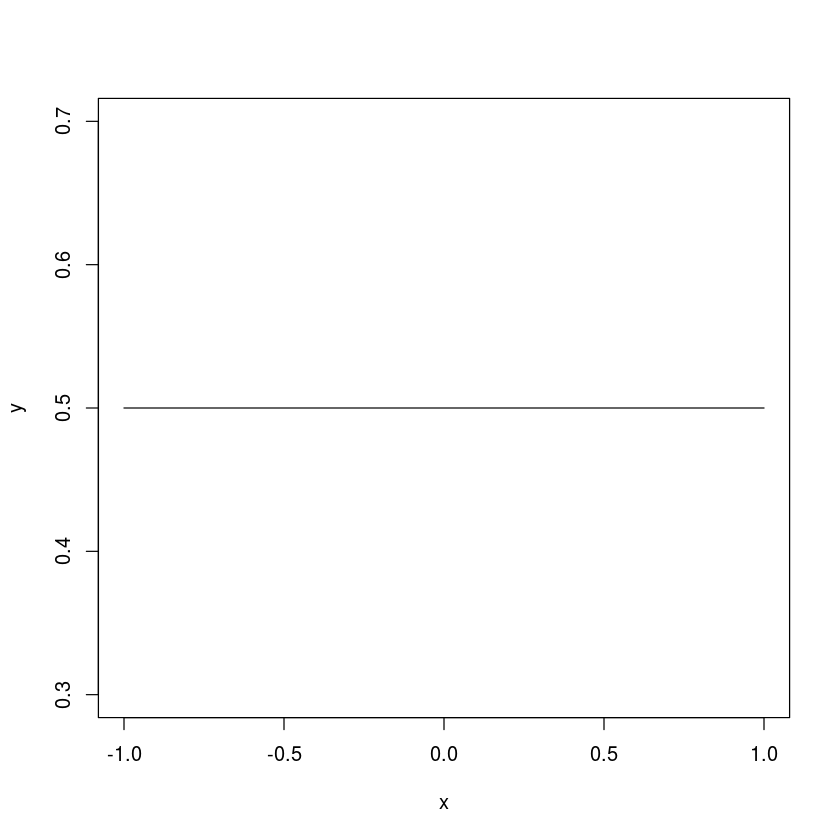

In [22]:
x = seq(-1, 1, 0.01)
y = dunif(x, -1, 1)
plot(x, y, type = 'l')

## (b)Generate 1000 independent sets of 800 independent uniform(-1, 1) r.v.s. {-}

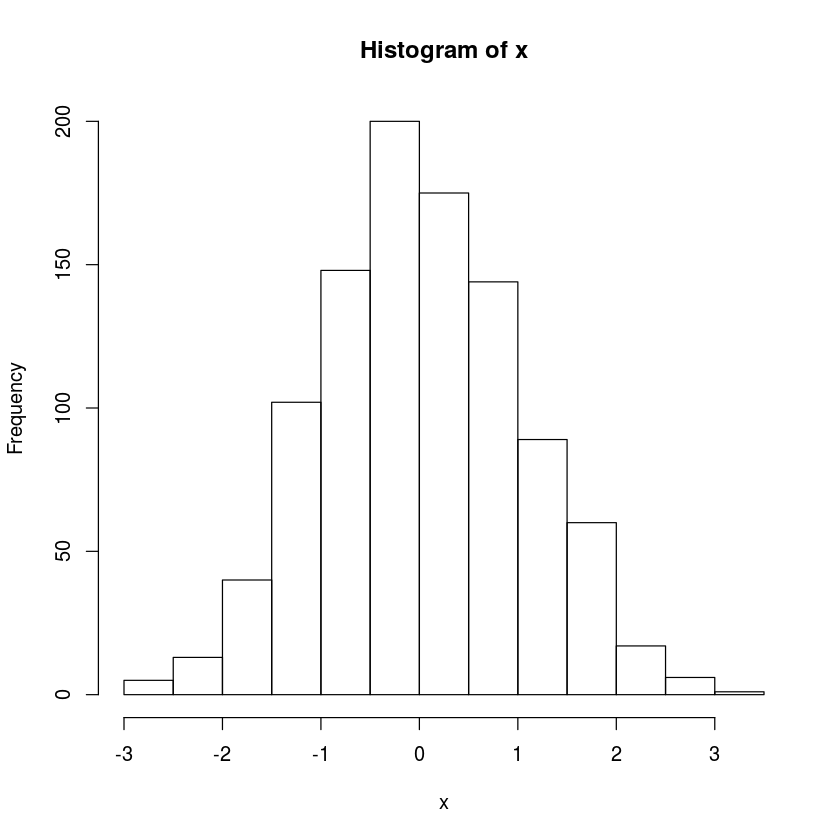

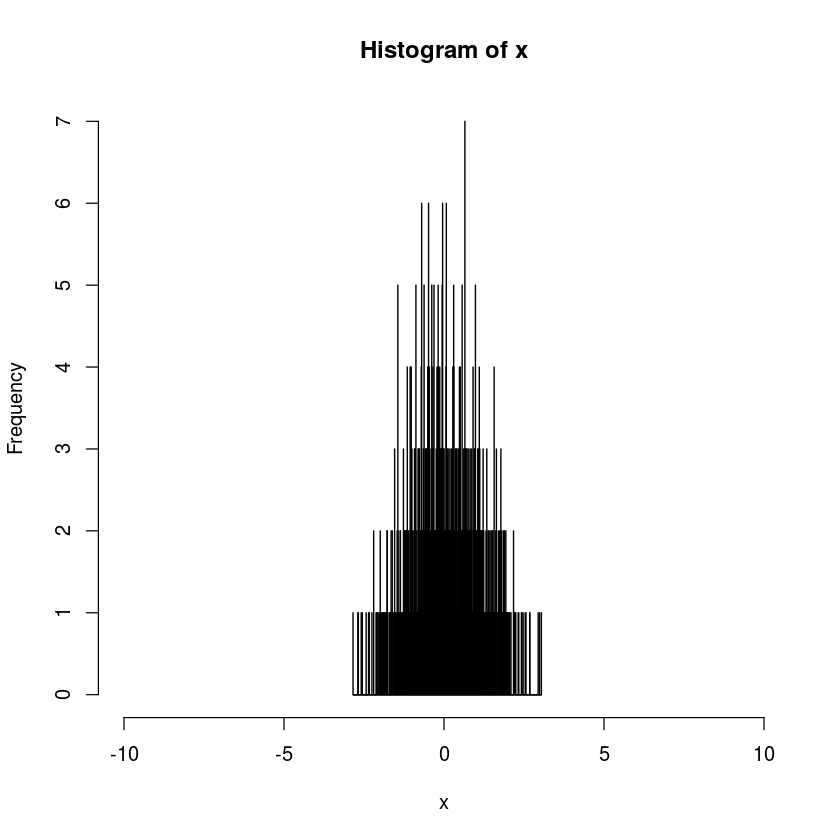

In [32]:
n = 800
m = 1000
u = runif(n * m, -1, 1)
dim(u) = c(n, m)
means = array(0, c(1, m))
sds = array(0, c(1, m))
x = array(0, c(1, m))

for(i in 1:m){
    means[i] = mean(u[,i])
    sds[i] = sd(u[,i])
    x[i] = means[i] * sqrt(n) / sds[i]
}

hist(x) 

breaks = 1000
xlim = c(-10, 10)
hist(x, breaks = 1000, xlim = c(-10, 10))

## (c) Do the histograms above look like ones from a standard normal distribution? {-}
I think the histograms I obtained in (b) looks like the histograms for a standard normal because its mean is close to 0 and its data are roughly symmetrical at its mean.
   

## (d) Kolmogorov-Smirnov test {-}

### Hypotheses to be tested:{-}
x is a set of 1000 samples where each sample was generated from normalizing 800 $Uni(-1, 1)$
<br>
<br>
\begin{align}
H_0 : f_x(x) = f_z(z)\\
versus \quad \\
H_1 : f_x(x) \neq f_z(z)\\
where \quad f_z(z) = \frac{1}{\sqrt{2\pi}}e^\frac{-z^2}{2}\\
\end{align}

In [39]:
ks.test(x, pnorm)
ks.test(x, pnorm, alternative = c("two.sided"))


	One-sample Kolmogorov-Smirnov test

data:  x
D = 0.021994, p-value = 0.7187
alternative hypothesis: two-sided



	One-sample Kolmogorov-Smirnov test

data:  x
D = 0.021994, p-value = 0.7187
alternative hypothesis: two-sided


#### Disclaimer{-}
Although, the output above says "One-sample Kolmogorov-Smirnov test", the test is doing the two-sided by default (based on documentation and also as I have shown above by adding the optional alternative parameter.)

## Conclusion{-}
If we let $\alpha = 0.05$ then, since $P-value = 0.7187 > 0.05$, we fail to reject our null hypothesis, suggesting that there is very strong evidence that our 1000 samples witch each sample was generated from normalizing 800 $Uni(-1, 1)$ come from a standard normal distribution.

# 2. Gamma Distrubtion{-}
## (a) Plot the p.d.f of a gamma random variable with parameters $a = 0.01$ and $\lambda = 1$. {-}

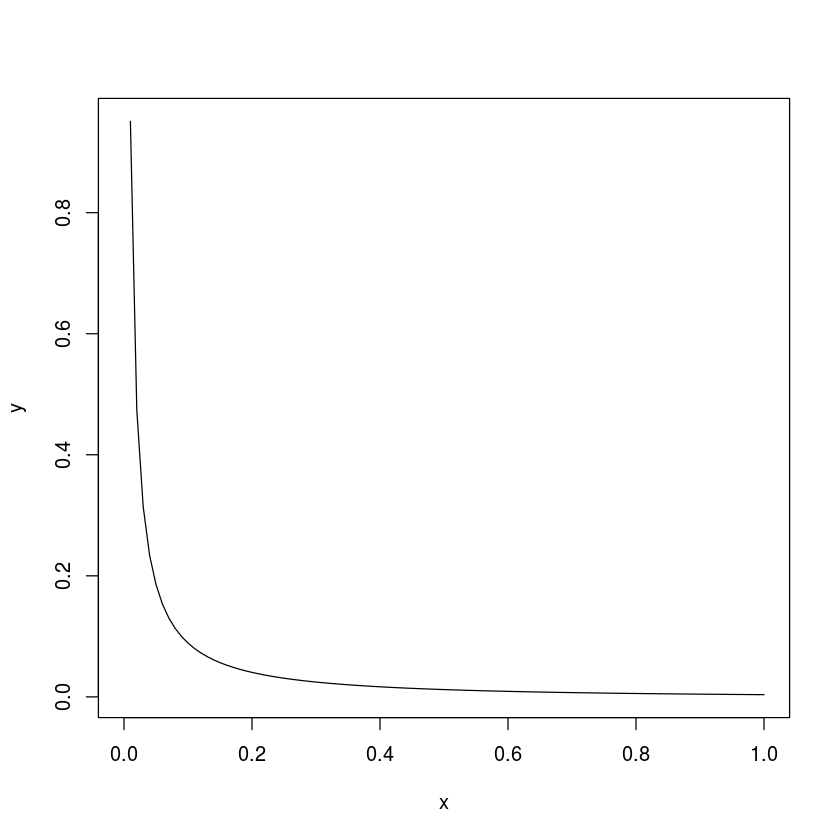

In [54]:
alpha = 0.01
lambda = 1
x = seq(0, 1, 0.01)
y = dgamma(x, alpha, lambda)
plot(x, y, type = 'l')

## (b) Generate 1000 independent sets of 800 independent Gamma(0.01, 1) r.v.s. {-}

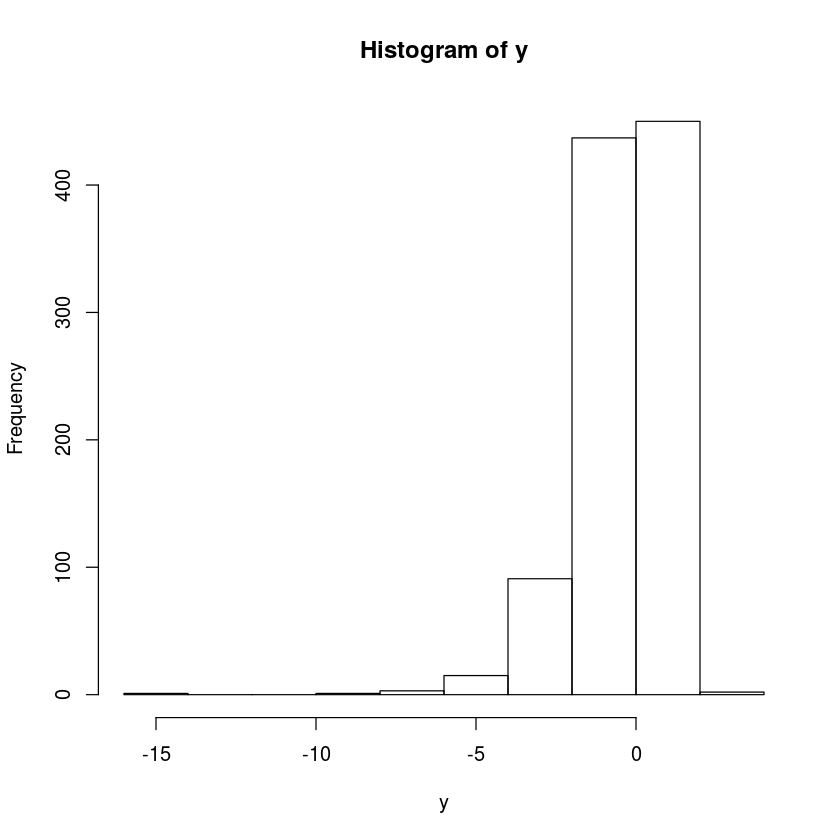

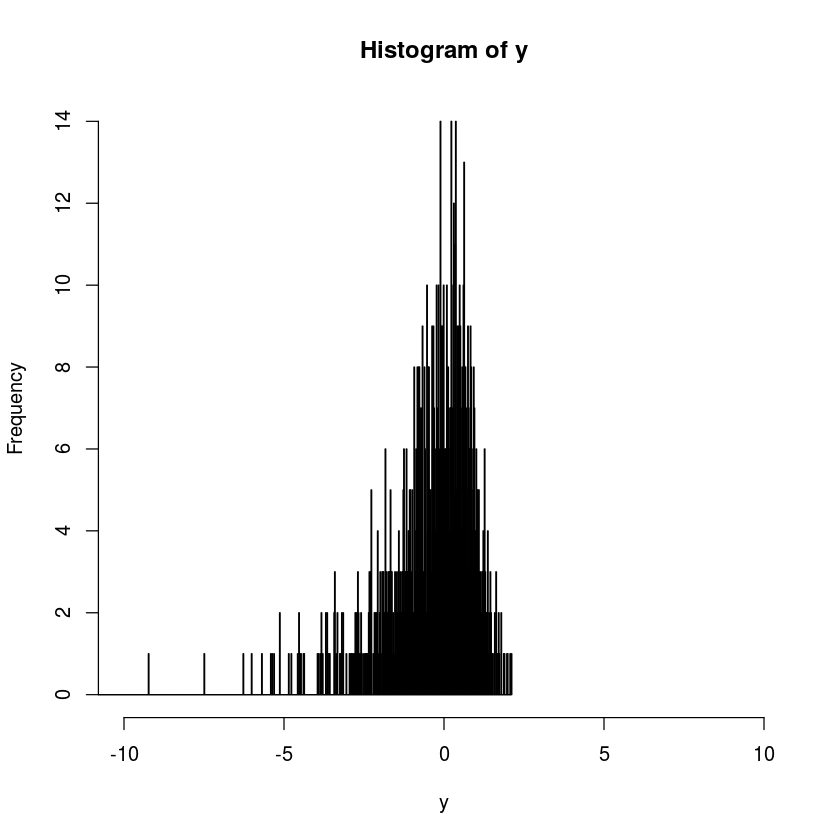

In [40]:
n = 800
m = 1000
g = rgamma(n * m, shape = alpha, rate = lambda)
true_mean = alpha/lambda

dim(g) = c(n, m)
means = array(0, c(1, m))
sds = array(0, c(1, m))
y = array(0, c(1, m))

for(i in 1:m){
    means[i] = mean(g[,i])
    sds[i] = sd(g[,i])
    y[i] = (means[i] - true_mean) * sqrt(n) / sds[i]
}

hist(y) 

breaks = 1000
xlim = c(-10, 10)
hist(y, breaks = 1000, xlim = c(-10, 10))

## (c) Do the histograms above look like ones from a standard normal distribution? {-}
It does not look like a standard normal distribution because the data points are not symmetrical about its mean. There are more data points on the left side of the mean.

## (d) Kolmogorov-Smirnov test {-}
### Hypotheses to be tested:{-}
y is a set of 1000 samples where each sample was generated from normalizing 800 $Gamma(0.01, 1)$
<br>
<br>
\begin{align}
H_0 : f_y(y) = f_z(z)\\
versus \quad \\
H_1 : f_y(y) \neq f_z(z)\\
where \quad f_z(z) = \frac{1}{\sqrt{2\pi}}e^\frac{-z^2}{2}\\
\end{align}

In [42]:
ks.test(y, pnorm)


	One-sample Kolmogorov-Smirnov test

data:  y
D = 0.10839, p-value = 1.246e-10
alternative hypothesis: two-sided


## Conclusion{-}
If we let $\alpha = 0.05$ then, since $p-value = 1.246e^{-10} < 0.05$, we reject our null hypothesis, suggesting that we don't have enough evidence to claim that our 1000 samples where each sample was generated from normalizing 800 $Gamma(0.01, 1)$ come from a standard normal distribution.

# 3. The Cauchy Distrubtion{-}
## (a) Plot the p.d.f of the Cauchy random variable. {-}

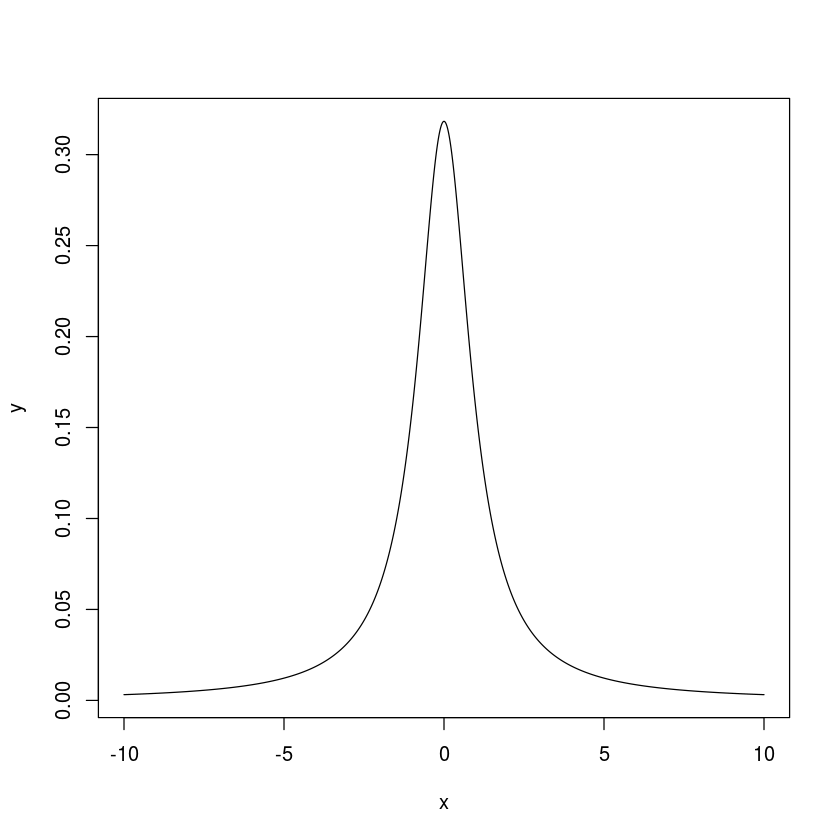

In [28]:
x = seq(-10, 10, 0.01)
y = dcauchy(x)
plot(x, y, type = 'l')

## (b) Generate 1000 independent sets of 800 independent Cauchy r.v.s. {-}

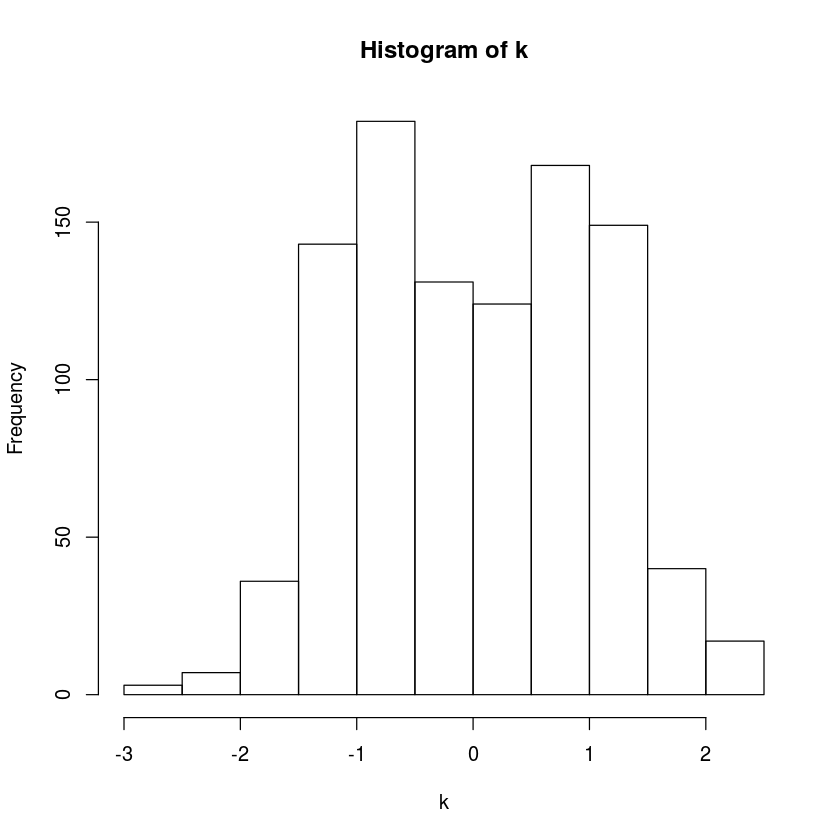

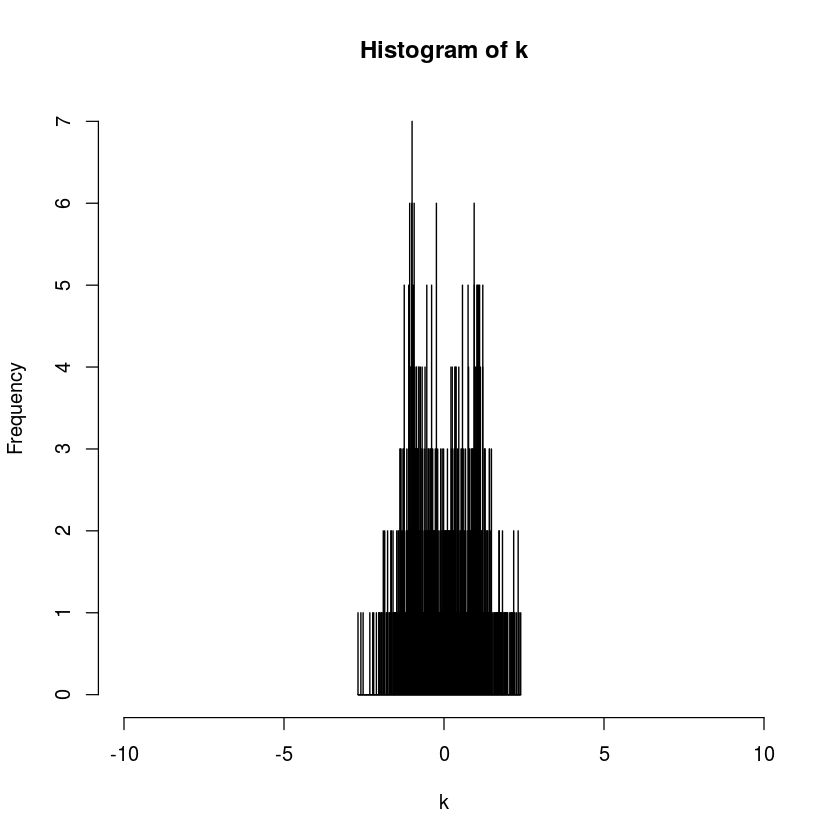

In [47]:
n = 800
m = 1000
C = rcauchy(n * m)
dim(C) = c(n, m)
means = array(0, c(1, m))
sds = array(0, c(1, m))
k = array(0, c(1, m))

for(i in 1:m){
    means[i] = mean(C[,i])
    sds[i] = sd(C[,i])
    k[i] = means[i] * sqrt(n) / sds[i]
}

hist(k) 

breaks = 1000
xlim = c(-10, 10)
hist(k, breaks = 1000, xlim = c(-10, 10))

## (c) Do the histograms above look like ones from a standard normal distribution? {-}
It does not look like a standard normal distribution because there is no clear mean.

## (d) Kolmogorov-Smirnov test {-}
### Hypotheses to be tested:
k is a set of 1000 samples where each sample was generated from normalizing 800 $Cauchy r.v.s$
<br>
<br>
\begin{align}
H_0 : f_k(k) = f_z(z)\\
versus \quad \\
H_1 : f_k(k) \neq f_z(z)\\
where \quad f_z(z) = \frac{1}{\sqrt{2\pi}}e^\frac{-z^2}{2}\\
\end{align}

In [45]:
ks.test(k, pnorm)


	One-sample Kolmogorov-Smirnov test

data:  k
D = 0.088626, p-value = 3.011e-07
alternative hypothesis: two-sided


## Conclusion{-}
If we let $\alpha = 0.05$ then, since $P-value = 3.011e^{-7} < 0.05$, we reject our null hypothesis, suggesting that we don't have enough evidence that our 1000 samples where each sample was generated from normalizing 800 Cauchy r.v.s come from a standard normal distribution.

# 4. Summary{-}
In the previous 3 parts, we've generated 1000 samples of $\frac{\bar{x} - \mu}{S/\sqrt{n}}$ where $\bar{x}$ was the sample means and $S$ was the sample standard deviations of 1000 uniform, gamma and cauchy random variables, respectively. Then, we conducted a Kolmogorov-Smirnov test to see if there is evidence that each set of 1000 samples of $\frac{\bar{x} - \mu}{S/\sqrt{n}}$ could come from the standard normal distribution.
<br>
<br>
In the case of the uniform distribution, we concluded that there is strong evidence that its samples we generated could come from the standard normal distribution. In the case of the gamma distribution and the cauchy distribution, however, we concluded that there is not enough evidence that its samples we generated come form the standard normal distribution. 
<br>
<br>
As the density of $Gamma(0.01, 1)$ is very skewed and we failed the test in part 2, we confirm the first case that we cannot assume the normality if the pdf of a random variable looks very skewed like the pdf of $Gamma (0.01, 1)$.
As the Cauchy has infinite variance and we failed the test in part 3, we confirm the second case that we cannot assume the normality if the variance of the random variable is inifinte.
<br>
<br>
Therefore, we claim that the assumption of normality becomes crucial if the data actually comes from the p.d.f which is very skewed or the cauchy distributions, suggesting that we cannot perform a t-test if we find that the data fits in either of these two cases.